In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

from matplotlib.colors import ListedColormap
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
# Generate a simple 2D dataset using NumPy
np.random.seed(42)

# Data 1
# # Create two classes
# class_0 = np.random.randn(100, 2) + np.array([-2, -2])  # Shifted cluster for Class 0
# class_1 = np.random.randn(100, 2) + np.array([2, 2])    # Shifted cluster for Class 1

# # Stack data together
# x = np.vstack((class_0, class_1))
# y = np.hstack((np.zeros(100), np.ones(100)))  # Labels: 0 for class_0, 1 for class_1

# Data 2
x, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)


In [5]:
# Define Logistic Regression Model using PyTorch
class LogisticRegressionNN(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionNN, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [6]:
# Instantiate model
model_nn = LogisticRegressionNN(input_dim=2)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model_nn.parameters(), lr=0.1)

In [7]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred_tensor = model_nn(X_train_tensor)
    
    # Compute loss
    loss = criterion(y_pred_tensor, y_train_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    y_test_pred_tensor = model_nn(X_test_tensor)
    y_test_pred = (y_test_pred_tensor.numpy() >= 0.5).astype(int)
    accuracy_nn = accuracy_score(y_test, y_test_pred)

print(f"Neural Network Logistic Regression Accuracy: {accuracy_nn:.2f}")

Epoch [100/1000], Loss: 0.3526
Epoch [200/1000], Loss: 0.3412
Epoch [300/1000], Loss: 0.3390
Epoch [400/1000], Loss: 0.3384
Epoch [500/1000], Loss: 0.3382
Epoch [600/1000], Loss: 0.3381
Epoch [700/1000], Loss: 0.3381
Epoch [800/1000], Loss: 0.3381
Epoch [900/1000], Loss: 0.3381
Epoch [1000/1000], Loss: 0.3381
Neural Network Logistic Regression Accuracy: 0.80


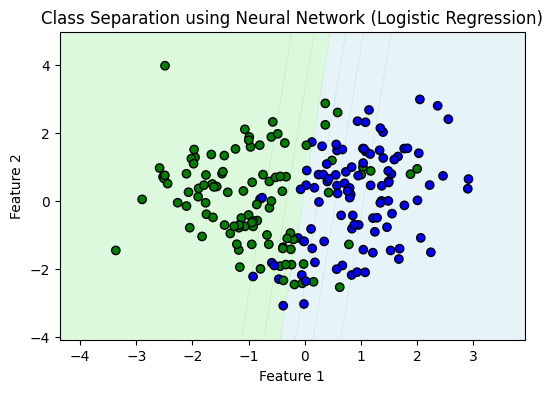

In [8]:
# Create mesh grid for decision boundary
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict decision boundary
with torch.no_grad():
    Z_nn = model_nn(grid_tensor).numpy().reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z_nn, alpha=0.3, cmap=ListedColormap(["lightgreen", "lightblue"]))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=ListedColormap(["green", "blue"]), edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Class Separation using Neural Network (Logistic Regression)")
plt.show()